In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

### Load Dataset

In [85]:
df=pd.read_csv('toyota.csv')

In [86]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [87]:
df.shape

(6738, 9)

In [88]:
df.describe

<bound method NDFrame.describe of                model  year  price transmission  mileage fuelType  tax   mpg  \
0               GT86  2016  16000       Manual    24089   Petrol  265  36.2   
1               GT86  2017  15995       Manual    18615   Petrol  145  36.2   
2               GT86  2015  13998       Manual    27469   Petrol  265  36.2   
3               GT86  2017  18998       Manual    14736   Petrol  150  36.2   
4               GT86  2017  17498       Manual    36284   Petrol  145  36.2   
...              ...   ...    ...          ...      ...      ...  ...   ...   
6733              IQ  2011   5500    Automatic    30000   Petrol   20  58.9   
6734   Urban Cruiser  2011   4985       Manual    36154   Petrol  125  50.4   
6735   Urban Cruiser  2012   4995       Manual    46000   Diesel  125  57.6   
6736   Urban Cruiser  2011   3995       Manual    60700   Petrol  125  50.4   
6737   Urban Cruiser  2011   4495       Manual    45128   Petrol  125  50.4   

      engineSize 

### Cleaning Dataset From NULL Values

In [89]:
data=df.dropna(axis=0)
data.describe

<bound method NDFrame.describe of                model  year  price transmission  mileage fuelType  tax   mpg  \
0               GT86  2016  16000       Manual    24089   Petrol  265  36.2   
1               GT86  2017  15995       Manual    18615   Petrol  145  36.2   
2               GT86  2015  13998       Manual    27469   Petrol  265  36.2   
3               GT86  2017  18998       Manual    14736   Petrol  150  36.2   
4               GT86  2017  17498       Manual    36284   Petrol  145  36.2   
...              ...   ...    ...          ...      ...      ...  ...   ...   
6733              IQ  2011   5500    Automatic    30000   Petrol   20  58.9   
6734   Urban Cruiser  2011   4985       Manual    36154   Petrol  125  50.4   
6735   Urban Cruiser  2012   4995       Manual    46000   Diesel  125  57.6   
6736   Urban Cruiser  2011   3995       Manual    60700   Petrol  125  50.4   
6737   Urban Cruiser  2011   4495       Manual    45128   Petrol  125  50.4   

      engineSize 

In [90]:
print(df.dtypes)

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


### Defining Input and Output data that use Integer dan Float

In [91]:
features=['year','mileage','tax','mpg','engineSize']
x=data[features]
y=data['price']
x.shape,y.shape

((6738, 5), (6738,))

### Splitting data for training and testing

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=70)
y_test.shape

(1685,)

### Creating ML Model using K-Nearest Neighbors algorithm

In [93]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model=KNN_Reg(n_neighbors=80)

#Model Training
model.fit(x_train,y_train)
acc1=model.score(x_test,y_test)

#Test for Prediction
test_predict=model.predict(x_test)
score=mse(test_predict,y_test)
print(' MSE : ',score,'\n','Accuracy : ',acc1)

 MSE :  34239712.80069909 
 Accuracy :  0.09915033838630982


### Using Elbow method to decide best K Value

In [94]:
def Elbow(K):
  #Initiating Empty List
  test_mse=[]

  #Train model for every value of K
  for i in K:
    model=KNN_Reg(n_neighbors=i)
    model.fit(x_train,y_train)
    tmp=model.predict(x_test)
    tmp=mse(tmp,y_test)
    test_mse.append(tmp)
  return test_mse

### Showing K Value based on MSE

Text(0.5, 1.0, 'Elbow Curve for Test')

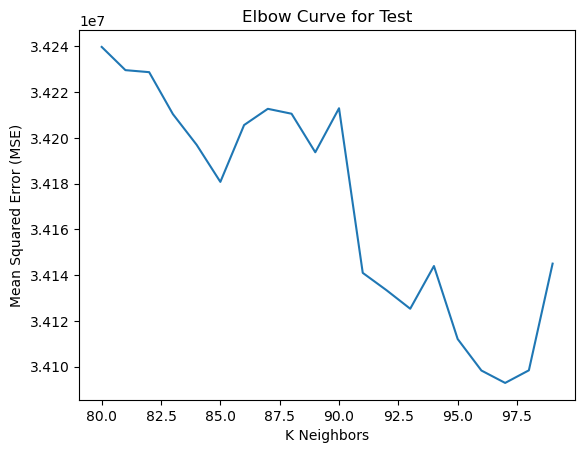

In [95]:
K=range(80,100)
test=Elbow(K)

plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

### Correcting K Values using K Best Values based on Elbow Method result

In [96]:
new_model=KNN_Reg(n_neighbors=97)

new_model.fit(x_train,y_train)
acc2=new_model.score(x_test,y_test)

print(' Accuracy of New Model (%) :  ',acc2*100,'\n','Accuracy of Old Model (%) : ',acc1*100,'\n Improvement (%) : ',(acc2-acc1)*100)

 Accuracy of New Model (%) :   10.30126886019379 
 Accuracy of Old Model (%) :  9.915033838630983 
 Improvement (%) :  0.38623502156280853


### Example of ML use that created to predict used car price in UK

##### Predicting with data input as :
##### 1. Year of car manufactured -- year
##### 2. Car mileage in mil -- mileage
##### 3. Car tax that applicable -- tax
##### 4. Average gas needs in mpg -- mpg
##### 5. Engine size -- engineSize

##### Currency convert : £1 =Rp 19110

In [97]:
#Test 1
#Year=2019, mileage=5000, tax=145, mpg=30.2, engineSize=2
input_data=np.array([[2019,5000,145,30.2,2]])

prediction=model.predict(input_data)
print('Predicted Car Price in EUR : ',prediction)


Predicted Car Price in EUR :  [15614.325]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [98]:
import pickle

filename='usedcar_model.sav'
pickle.dump(model,open(filename,'wb'))